# Predicting Heart Disease using Machine Learning

This notebook looks into various Python-based machine learning and data science libraries to try to build a machine learning model that is capable of predicting whether or not someone has heart disease based on their medical attributes.

The steps:
1. Problem Definition
2. Look at the Data
3. Set Up Evaluation Metrics
4. Features
5. Modelling
6. Tuning and Experimentation

## 1. Problem Definition
> By using a patient's medical attributes, can we decide whether or not they have heart disease?

## 2. Look at the Data

The original data came from the UCI Machine Learning Repository. Specifically, the Cleveland heart disease dataset: https://archive.ics.uci.edu/dataset/45/heart+disease

It is also available on Kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Set Up Evaluation Metrics

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease, we can pursue the project.

## 4. Features

**Create Data Dictionary**
1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute



## Getting the tools ready 

We're going to use Pandas, NumPy and Matplotlib for the data manipulation

In [51]:
# Import the tools 

# Regular EDA and plotting libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis (EDA)

Checklist to explore the data:
1. What questions are you trying to solve?
2. What kind of data do we have?
3. What's missing in the dataset?
4. Where are the outliers?
5. Can you add, change or remove stuff to get more out of the data? 

In [4]:
# Check how many of each class there is to see if it's balanced
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

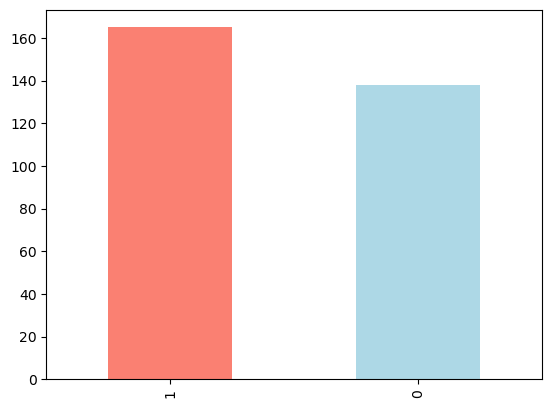

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disesase frequency according to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


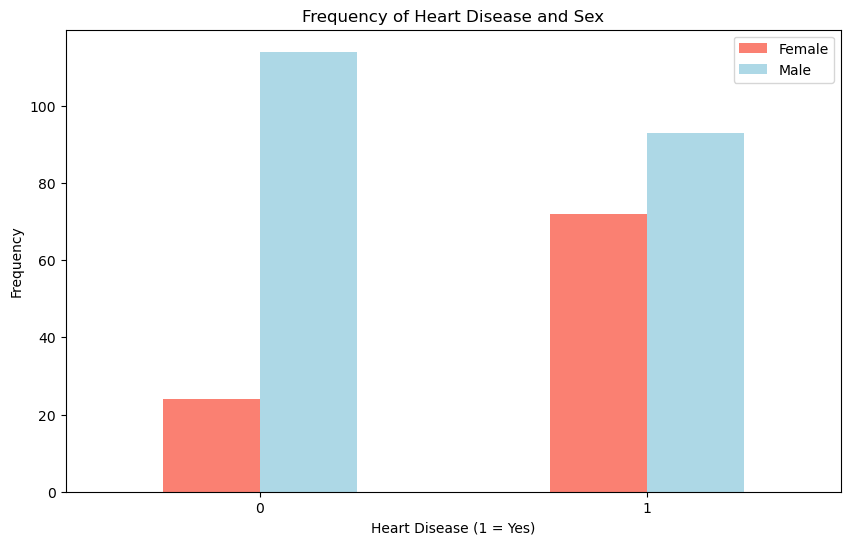

In [11]:
# Create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Frequency of Heart Disease and Sex");
plt.xlabel("Heart Disease (1 = Yes)");
plt.ylabel("Frequency");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

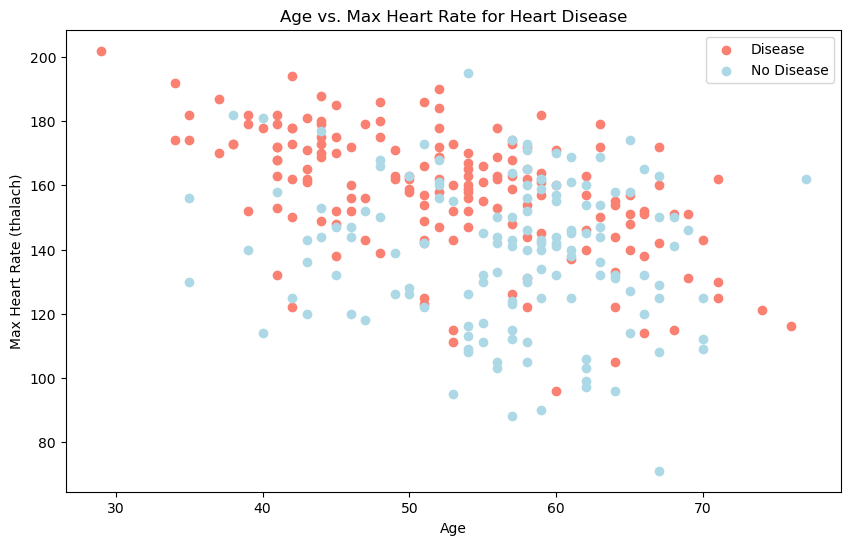

In [12]:
# We're comparing age, thalach and target
# Scatter with positive examples
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");
plt.title("Age vs. Max Heart Rate for Heart Disease");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate (thalach)");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue");
plt.legend(["Disease", "No Disease"]);

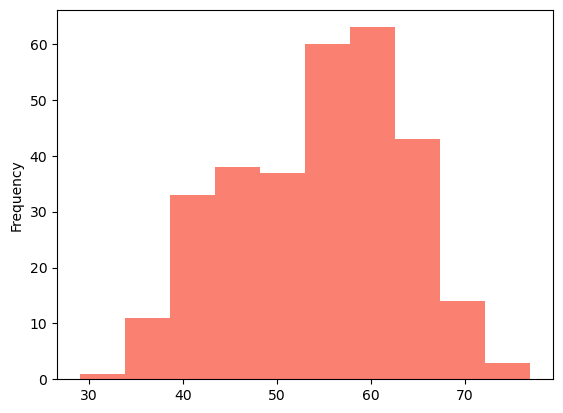

In [13]:
# Check the distribution of the age using a histogram
df.age.plot.hist(color="salmon");

### Heart Disease Frequency per Chest Pain Type

cp: chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


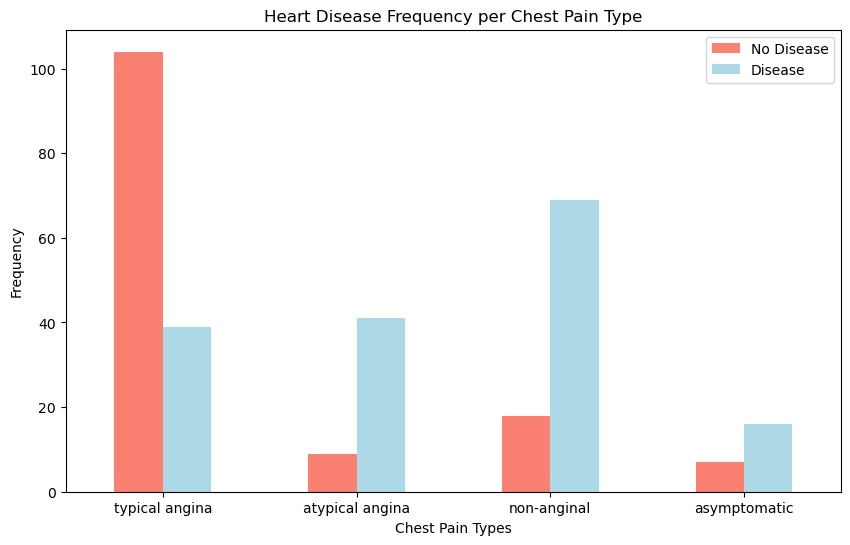

In [15]:
# Making the plot
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type");
plt.xlabel("Chest Pain Types");
plt.ylabel("Frequency");
plt.legend(["No Disease", "Disease"]);
labels=["typical angina", "atypical angina", "non-anginal", "asymptomatic"]
plt.xticks(range(len(labels)), labels, rotation=0);

In [16]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


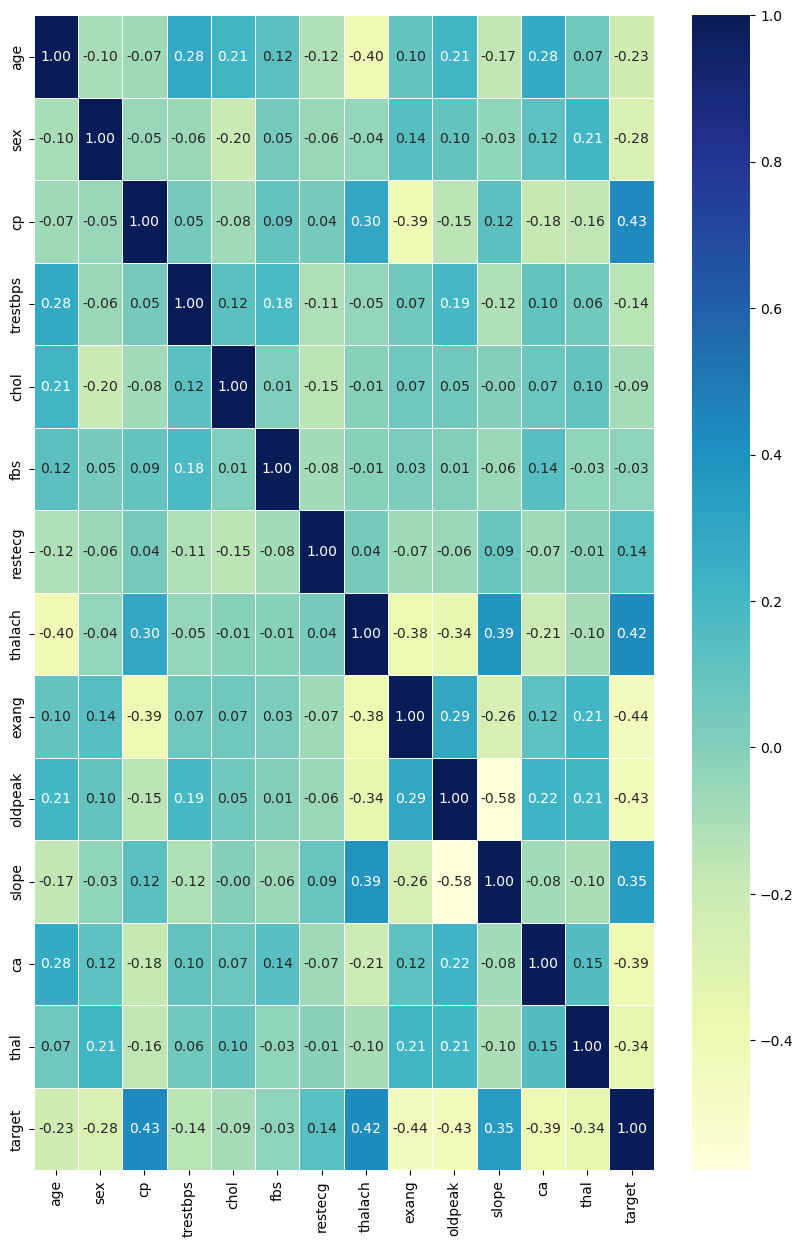

In [17]:
# Let's plot the matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modelling

In [18]:
# Split the data into X (features) and Y (labels)
X = df.drop("target", axis=1)
Y = df["target"]

# Split the data into train and test sets
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

We have split the data into training and test sets

Now we have to select a model and we have chosen 3:
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier

In [19]:
# Put the models in a dictionary and create a function to fit and score them
models = {"LogisticRegression":LogisticRegression(),
          "K-NearestNeighbour":KNeighborsClassifier(),
          "RandomForest":RandomForestClassifier()}

def fit_and_score(models:dict, X_train:DataFrame, X_test:DataFrame, Y_train:DataFrame, Y_test:DataFrame)->None:
    """
    Takes a dictionary of models and their train and test sets of data.
    Fits the model and scores them
    """
    np.random.seed(42)
    # Dictionary of model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

C:\Users\user\Desktop\heart_disease_ml_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'K-NearestNeighbour': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Comparing Models

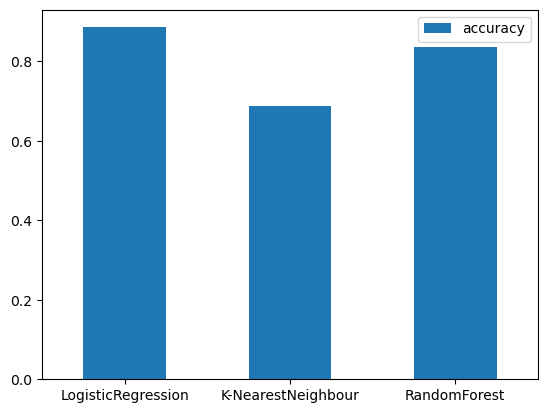

In [21]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

### Hyperparameter Tuning (Manually)

In [22]:
# Tuning KNN 

train_scores = []
test_scores = []

# Creating a list of different values for N-Neighbours
neighbours = range(1, 21)

knn = KNeighborsClassifier()

# Loop through the different number of N-neighbours
for i in neighbours:
    # Setting the parameter and fitting
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    # Scoring and storing the score 
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))


In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [24]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

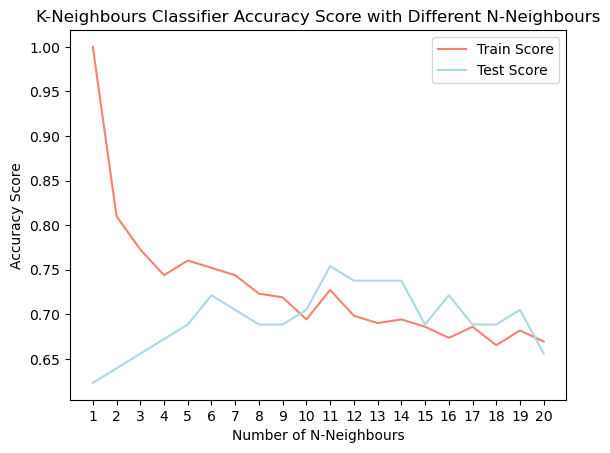

In [25]:
plt.plot(neighbours, train_scores, label="Train Scores", color="salmon");
plt.plot(neighbours, test_scores, label="Test Scores", color="lightblue");
plt.legend(["Train Score", "Test Score"]);
plt.xlabel("Number of N-Neighbours");
plt.ylabel("Accuracy Score");
plt.title("K-Neighbours Classifier Accuracy Score with Different N-Neighbours");
plt.xticks(neighbours);

### Hyperparameter Tuning (RandomizedSearchCV)

In [26]:
# Creating a hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Creating a hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [27]:
# Tuning LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit hyperparameter search
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

Tuning RandomForestClassifier()

In [30]:
# Setup Random Seed
np.random.seed(42)

# Setup RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

Since the LogisticRegression has the best scores so far, We will improve that using GridSearchCV

In [33]:
# Setting up grid and GridSearchCV instance
log_reg_grid = {"C":np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fitting the model
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

After tuning, we can see that even though the Random Forest Classifier improves its accuracy score, the Logistic Regression model still scores higher. Therefore, we will be using Logistic Regression as the model

## Evaluating the Tuned Model

* ROC and AUC score 
* Confusion Matrix 
* Classification Report 
* Precision
* Recall
* F1-Score

In [36]:
# Making predictions with tuned model
Y_preds = gs_log_reg.predict(X_test)
Y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

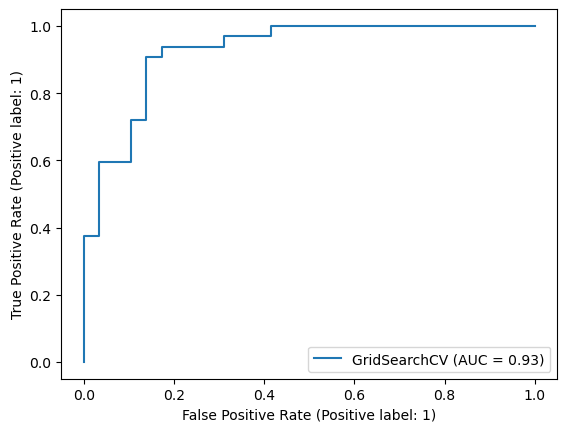

In [37]:
# Plot ROC Curve and Calculate AUC Score
RocCurveDisplay.from_estimator(gs_log_reg, X_test, Y_test);

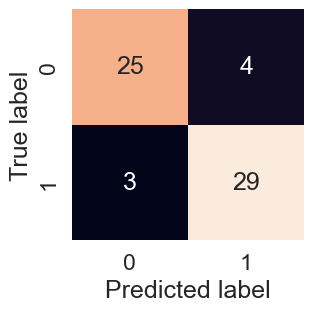

In [38]:
# Confusion Matrix 
sns.set(font_scale=1.5)
def conf_matrix(Y_test, Y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");

conf_matrix(Y_test, Y_preds)

In [39]:
# Normal Classification Report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross-Validated Metrics

We are going to calculate accuracy, precision, recall and f1-score using cross-validation. We will be using `cross_val_score()`

In [40]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Create a new classifier
clf = LogisticRegression(C=0.20433597178569418, 
                         solver="liblinear")

In [42]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [43]:
# Cross-validated Precision
cv_precision = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [44]:
# Cross-validated Recall
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [45]:
# Cross-validated F1-Score
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

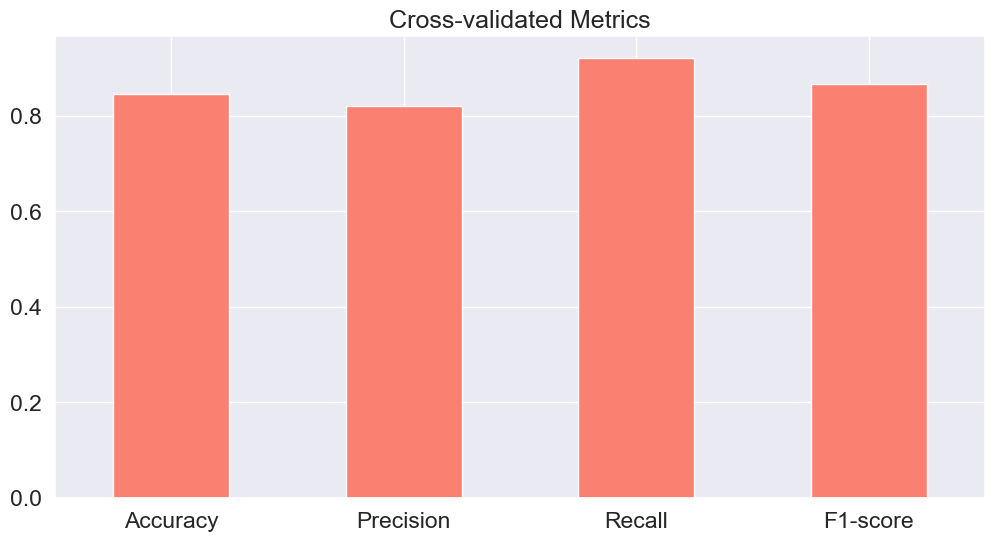

In [46]:
# Visualize cross-validated scores 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_precision, "Recall": cv_recall, "F1-score": cv_f1},
                          index=[0])
cv_metrics.T.plot(kind="bar", figsize=(12, 6), color="salmon", legend=False);
plt.title("Cross-validated Metrics");
plt.xticks(rotation=0);

### Feature Importance

In [47]:
# Fit a model of Logistic Regression 
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [48]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [49]:
# Match coef_ to the columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

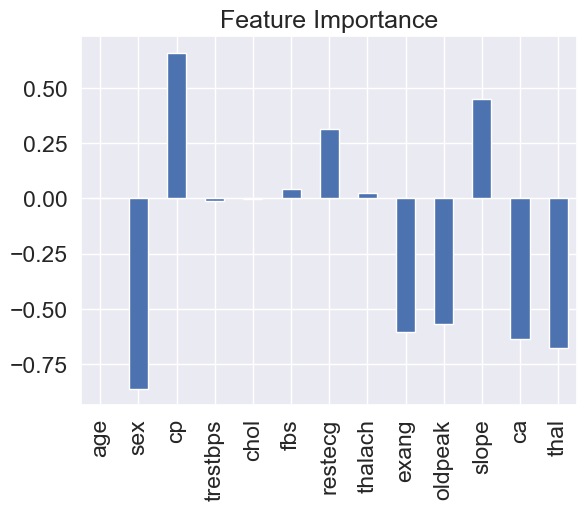

In [50]:
# Plotting a graph
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", title="Feature Importance", legend=False);

## 6. Experimentation

To potentially improve the model, I could:
* Collect more data
* Try a different platform?

In [54]:
# Save the model
pickle.dump(clf, open("heart_disease_model.pkl", "wb"))